# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [119]:
url = 'https://raw.githubusercontent.com/Rosdiana13/Week-4---Dm---Ros-Diana/refs/heads/main/penguins_size.csv'
df = pd.read_csv(url)
df.sample(n=10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
184,Chinstrap,Dream,42.5,16.7,187.0,3350.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
294,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,FEMALE
275,Gentoo,Biscoe,45.0,15.4,220.0,5050.0,MALE
174,Chinstrap,Dream,43.2,16.6,187.0,2900.0,FEMALE
146,Adelie,Dream,39.2,18.6,190.0,4250.0,MALE
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,FEMALE
273,Gentoo,Biscoe,50.1,15.0,225.0,5000.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [121]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [122]:
col_names = ['species',	'island', 'sex']

for col in col_names:
    print(df[col].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


5. Drop the null column(s)

In [123]:
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [124]:
df.loc[(df['species']== 'Gentoo') & (df['sex']=='.')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [125]:
df[df['species']== 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

7. Create your own insightful visualization and explain it in at least 2 sentences

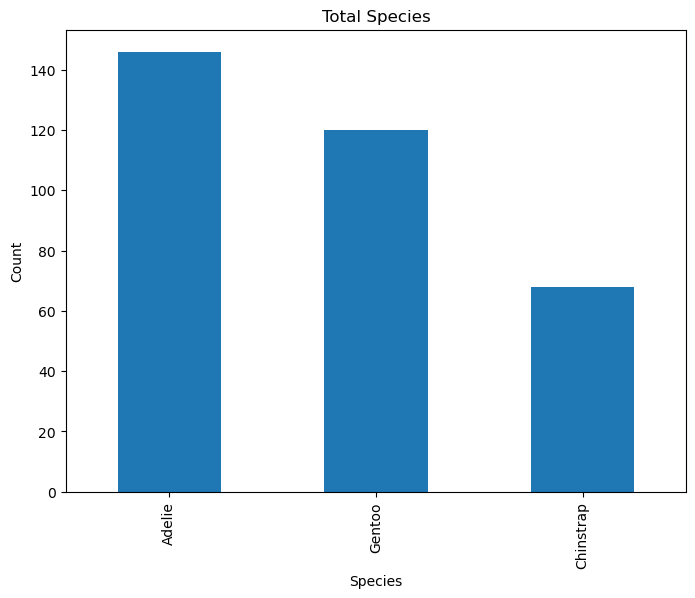

In [126]:
# Vesual = ['island',	'culmen_length_mm',	'culmen_depth_mm',	'flipper_length_mm', 'body_mass_g',	'sex', 'species']

species_counts = df['species'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar')
plt.title('Total Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()



8. Check unique value of our target variable

In [127]:
unique_species = df['species'].unique()
print(":", unique_species)

: ['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [128]:
sex_map = {'MALE':1,'FEMALE':0}
island_map = {'Biscoe':3, 'Dream':1, 'Torgersen':2}

df['sex'] = df['sex'].map(sex_map)
df['island'] = df['island'].map(island_map)

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1.0
1,Adelie,2,39.5,17.4,186.0,3800.0,0.0
2,Adelie,2,40.3,18.0,195.0,3250.0,0.0
4,Adelie,2,36.7,19.3,193.0,3450.0,0.0
5,Adelie,2,39.3,20.6,190.0,3650.0,1.0


10. encode the target column and display the results

In [129]:
label_encoder = LabelEncoder()

df['species'] = label_encoder.fit_transform(df['species'])
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'].astype(str))  

# Display the encoded DataFrame
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,1,39.1,18.7,181.0,3750.0,1
1,0,1,39.5,17.4,186.0,3800.0,0
2,0,1,40.3,18.0,195.0,3250.0,0
4,0,1,36.7,19.3,193.0,3450.0,0
5,0,1,39.3,20.6,190.0,3650.0,1


11. create a heatmap to see the correlation and explain the conclusion

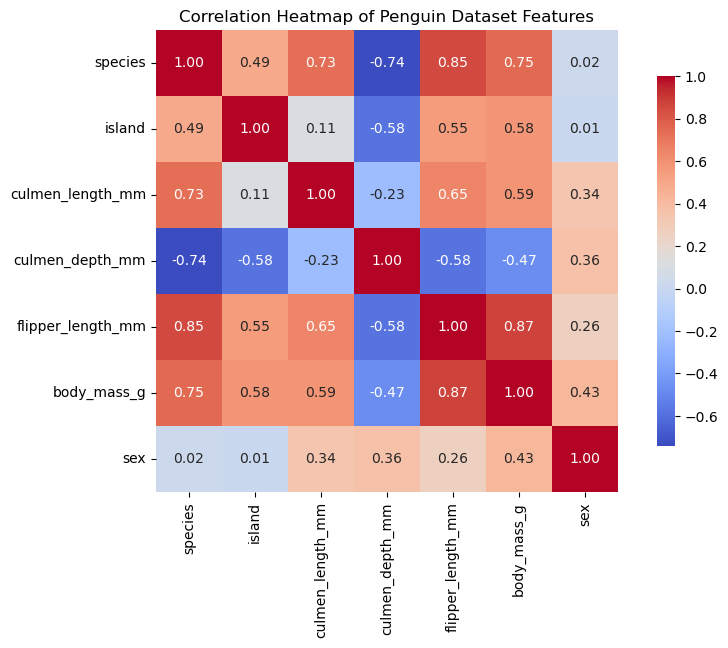

In [130]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title("Correlation Heatmap of Penguin Dataset Features")
plt.show()

## Machine Learning

1. Splitting X and y

In [131]:
X = df.drop('species', axis=1)
y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [133]:
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [134]:
# import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [135]:
# a. Define Model
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [136]:
# b. Predict the test set results
y_pred_en = clf_en.predict(X_test)

In [143]:
# c. Check Accuracy Score
print("Model accuracy score with criterion entropy:{:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy:1.0000


In [144]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_en.score(X_test, y_test)))

Training set score: 0.9850
Test set score: 1.0000


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113, 50, 1]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[0] <= 0.5\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.239\nsamples = 51\nvalue = [2, 49, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2, 5, 96]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\nentropy = 0.863\nsamples = 7\nvalue = [2, 5, 0]'

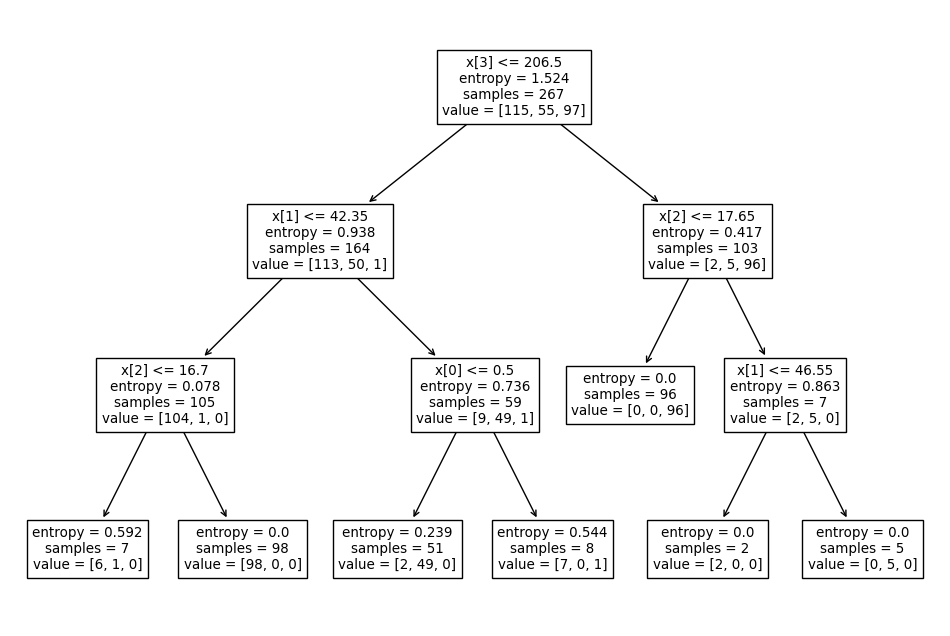

In [149]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [3]:
# h. Results and Conclusion
#Secara keseluruhan, tree ini menunjukkan pembagian dataset yang efektif dengan banyak cabang yang memiliki entropy nol atau mendekati nol, artinya model ini cukup baik dalam mengklasifikasikan data.

2. Criterion Gini index

In [150]:
# a. Define Model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [151]:
# b. Predict the test set results
y_pred_gini = clf_gini.predict(X_test)

In [152]:
# c. Check Accuracy Score
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.9851


In [153]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_gini.score(X_test, y_test)))

Training set score: 0.9775
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113, 50, 1]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 0.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.042\nsamples = 47\nvalue = [1, 46, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2, 5, 96]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\ngini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(0.75, 0.125, 'gini = 

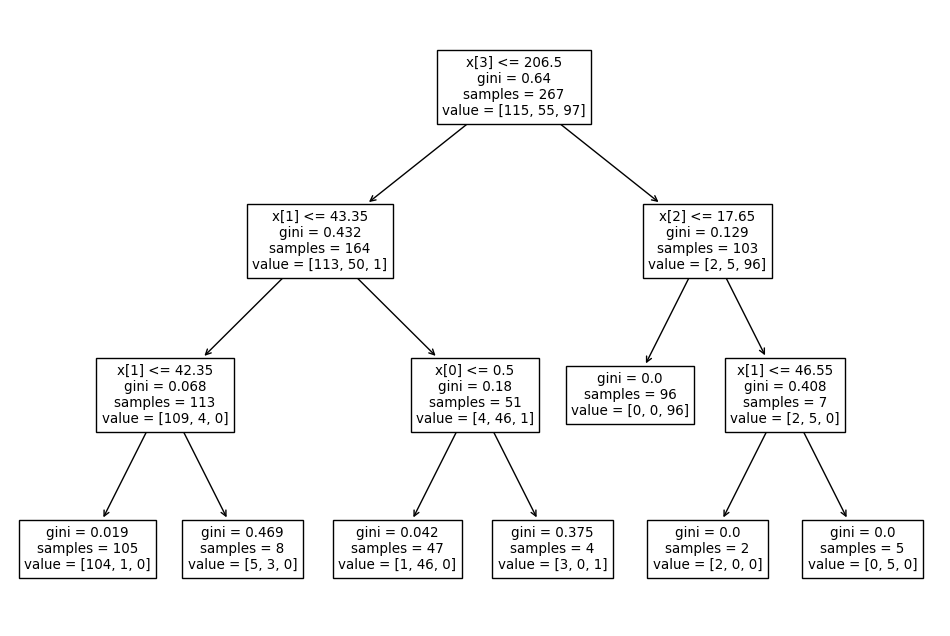

In [154]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

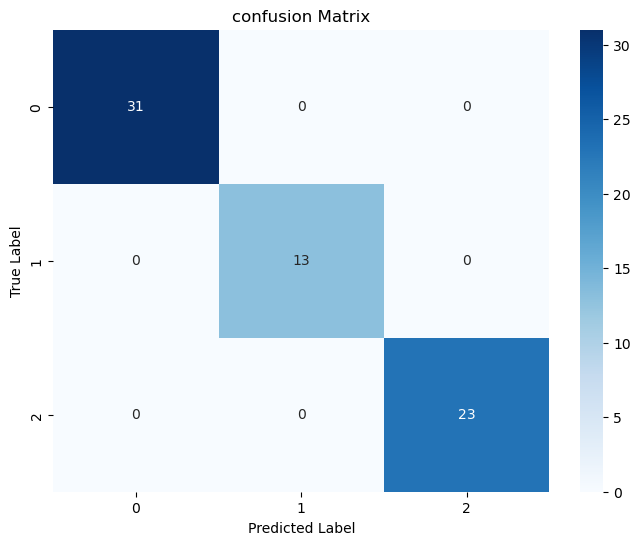

In [155]:
# f. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

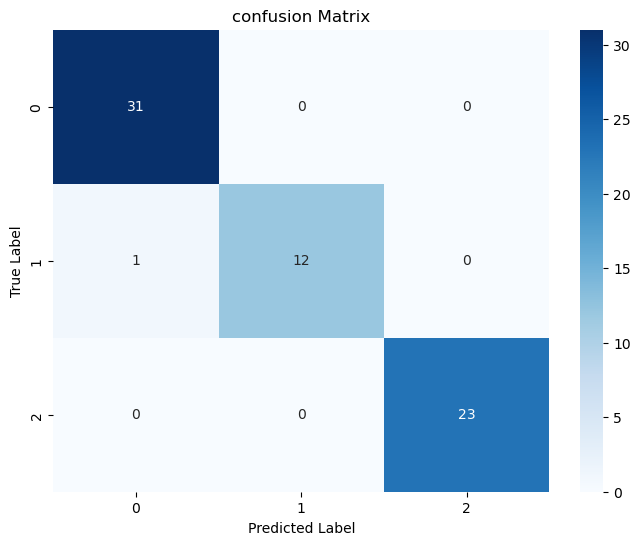

In [156]:
# f. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [157]:
# g. Classification Report
print(classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [158]:
# g. Classification Report
print(classification_report(y_test, y_pred_gini))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [159]:
from sklearn.naive_bayes import GaussianNB

In [160]:
# a.
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [161]:
# b.
nb_y_pred = nb_classifer.predict(X_test)

In [162]:
# c. 
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.9851


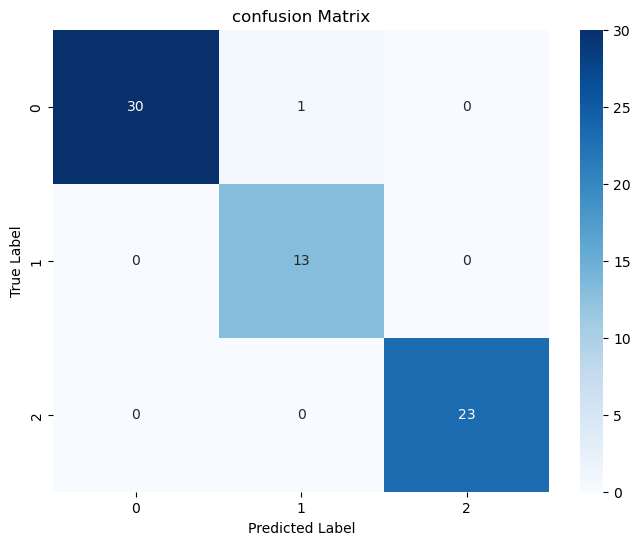

In [163]:
# d.
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [164]:
# e. Classification Report
print(classification_report(y_test, nb_y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [2]:
# f.Model Naive Bayes mencapai hasil sempurna karena dataset cocok dengan asumsi model (fitur independen) atau datasetnya sederhana dan mudah dipisahkan.

Good Luck :)